In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Plot and analyse docking results

In [28]:
docking_data = pd.read_csv('docking_data.csv', index_col=0)
print(docking_data.shape)
docking_data.head()

(315, 6)


,aptamer,pocket,pose,affinity (kcal/mol),rmsd l.b.,rmsd u.b.
0,13413413_bottom,0,1,-5.4,0.000,0.000
1,13413413_bottom,0,2,-5.1,1.297,1.832
2,13413413_bottom,0,3,-5.0,4.162,6.908
3,13413413_bottom,0,4,-4.9,2.190,4.438
4,13413413_bottom,0,5,-4.9,1.779,4.440


In [46]:
# aggregate and find best pocket for each aptamer
best_pockets = []
agg_data = docking_data[["aptamer", "pocket", "affinity (kcal/mol)"]].groupby(["aptamer", "pocket"]).agg(['mean', 'std'])
agg_data = agg_data.reset_index(level='pocket')
best_pockets = agg_data.groupby("aptamer").min()
best_pockets['affinity (kcal/mol)']

,mean,std
aptamer,,
1017320288_top,-8.18,0.044721
13413413_bottom,-7.06,0.114018
272918209_top,-8.58,0.089443
464311326_top,-8.02,0.044721
52522835_bottom,-7.08,0.070711
80072515_top,-8.44,0.089443
83718589_bottom,-8.18,0.070711
99112964_bottom,-8.66,0.130384


<AxesSubplot:title={'center':'Best binding affinities (kcal/mol)'}, ylabel='aptamer'>

<Figure size 720x720 with 0 Axes>

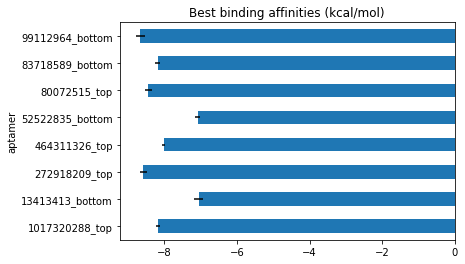

In [48]:
best_pockets['affinity (kcal/mol)'].plot(kind = "barh", y = "mean", legend = False,
                                         title = "Best binding affinities (kcal/mol)", xerr = "std")

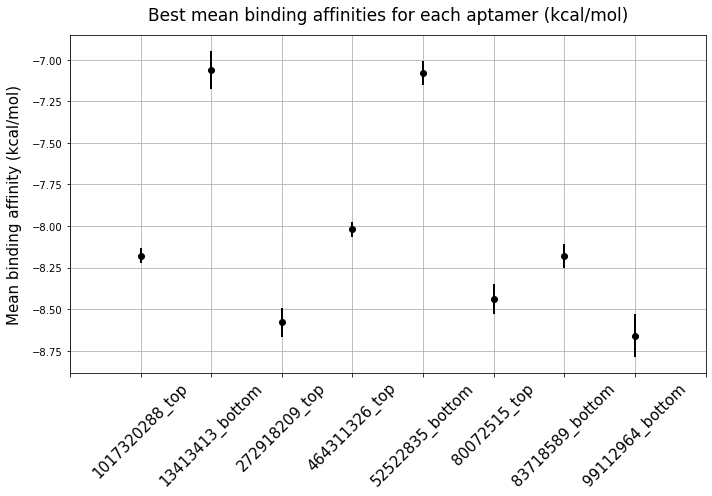

In [90]:
fig= plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

plt.errorbar(np.arange(8),
             best_pockets['affinity (kcal/mol)']['mean'],
             best_pockets['affinity (kcal/mol)']['std'],
             fmt='ok', lw=2)

ax.set_title("Best mean binding affinities for each aptamer (kcal/mol)", fontsize=17, pad=15)
ax.set_ylabel('Mean binding affinity (kcal/mol)', fontsize=15, labelpad=10)
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels([''] + list(best_pockets['affinity (kcal/mol)'].index) + [''], fontsize=15, rotation=45)
plt.tight_layout()
plt.grid()

plt.savefig('best_affinities.png', dpi=300)